## Problem 1

### Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
car = pd.read_csv('austo_automobile+(2)+(1).csv')
car.head(10)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
5,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,79800,60500.0,140300,57000,SUV
6,53,Female,Salaried,Married,Post Graduate,3,Yes,No,Yes,80900,50800.0,131700,51000,SUV
7,52,Male,Salaried,Married,Graduate,4,No,No,Yes,79100,40400.0,119500,68000,SUV
8,52,Male,Salaried,Married,Post Graduate,4,No,No,No,89400,0.0,89400,61000,SUV
9,52,Male,Salaried,Married,Post Graduate,3,No,No,No,83700,0.0,83700,57000,SUV


### A. What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables)

In [3]:
car.shape

(1581, 14)

In [4]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


##### Observation:    

    Data has been loaded correctly into the pandas dataframe 
    
    There are 1581 rows and 13 features
    
    There are missing values in 'Gender' and 'Partner_salary'
    
    'Gender' is categorised as object type.

### B. Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data? If yes, perform preliminary treatment of data.

In [6]:
car['Partner_salary'].isnull().sum()

106

#### Partner_salary has missing values, but the values are missing where there is no partner working , so theres no need to treat the missing values as it will affect the analysis.

#### Lets start with treating the missing values and anomalies of gender. 

In [7]:
car['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [8]:
def remove_anomalies(row):
    if row['Gender'] == 'Male': 
        return 'Male'
    elif row['Gender'] == 'Femal':
        return 'Female'
    elif row['Gender'] == 'Female':
        return 'Female'
    elif row['Gender'] == 'Femle':
        return 'Female'
    elif row['Gender'] == 'nan':
        return 'nan'
    else: 
        return row['Gender']

In [9]:
car['Gender'] = car.apply (remove_anomalies, axis=1)

In [10]:
car['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [11]:
car['Gender'] = car['Gender'].fillna(method='pad')

In [12]:
car.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

### C. Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

<AxesSubplot:xlabel='Age', ylabel='Count'>

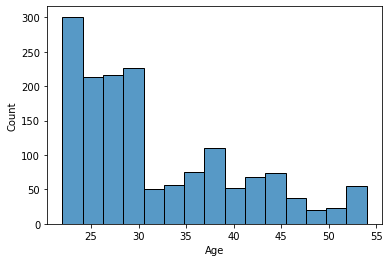

In [13]:
sns.histplot(data=car, x='Age')

<AxesSubplot:xlabel='Make', ylabel='Count'>

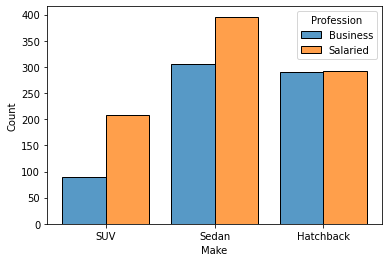

In [14]:
sns.histplot(data=car, x= 'Make', hue='Profession',multiple="dodge", shrink=.8)

#### Insights
We can observe that Salaried Professionals are likely to buy SUV's and Sedan's by a large margin than a Business Professionals. 
We can also observe that Hatchback Cars are equally bought by Salaried and Business Professionals.

<AxesSubplot:xlabel='Make', ylabel='count'>

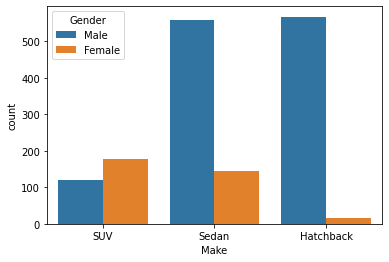

In [15]:
sns.countplot(data=car,x='Make',hue='Gender')

<AxesSubplot:xlabel='Salary'>

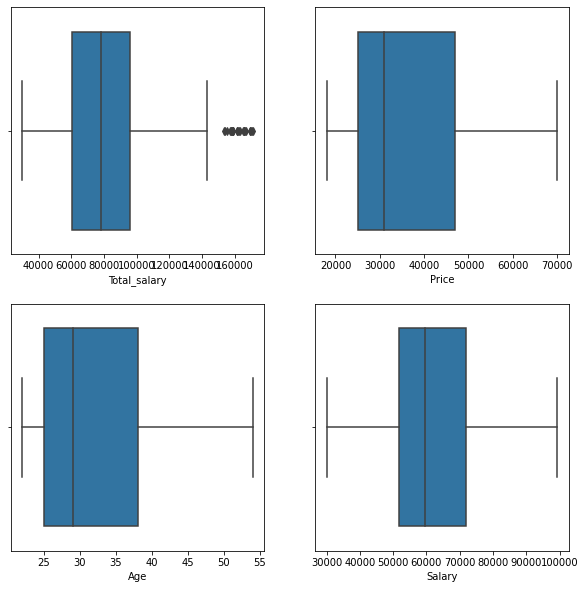

In [16]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)
sns.boxplot(x='Total_salary', data=car,ax=axes[0][0])
sns.boxplot(x='Price',data=car,ax=axes[0][1])
sns.boxplot(x='Age',data=car,ax=axes[1][0])
sns.boxplot(x='Salary',data=car,ax=axes[1][1])

#### Insights

Total_salary has multiple outliers in upper values

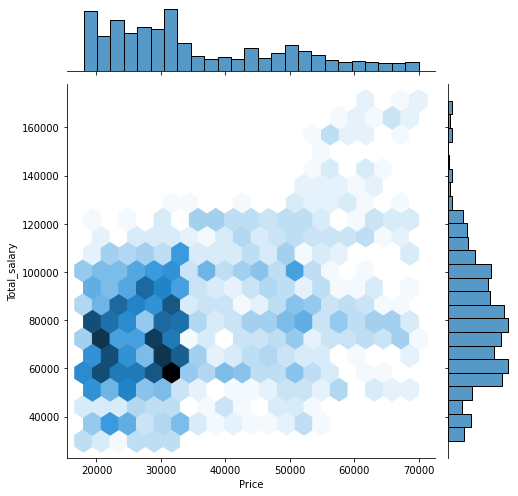

In [17]:
sns.jointplot(data=car, x='Price', y='Total_salary',kind='hex',height=7,marginal_kws=dict(bins=25, fill=True))

#### Insights
People with Total salary between 60000 to 100000 are the most number of buyers and also they buy in the lowest category 20000 to 40000 category. 

<AxesSubplot:xlabel='Make', ylabel='Total_salary'>

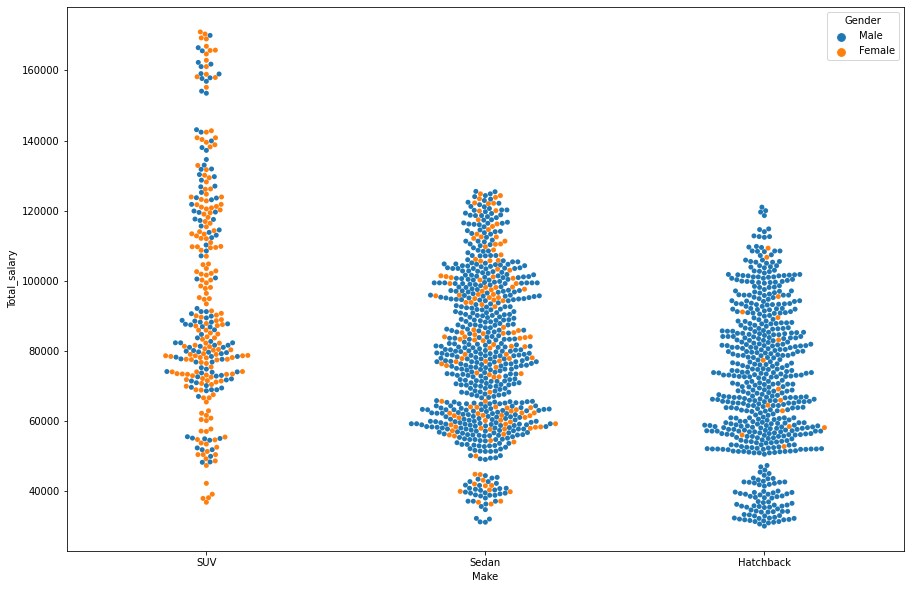

In [18]:
plt.figure(figsize=(15,10))
sns.swarmplot(data=car, x='Make',y='Total_salary',hue='Gender')
#sns.lmplot(data=car, y='Total_salary',x='Price',hue='Make',height=12)

#### Insights
SUV's are more likely to be bought by Female than Male population and Sedan and Hatchback are bought more by Male than Female population.

The very little population which has high salary prefer to buy SUV than Sedan and Hatchback and population with Medium to low salary prefer to buy Sedan and Hatchback.  

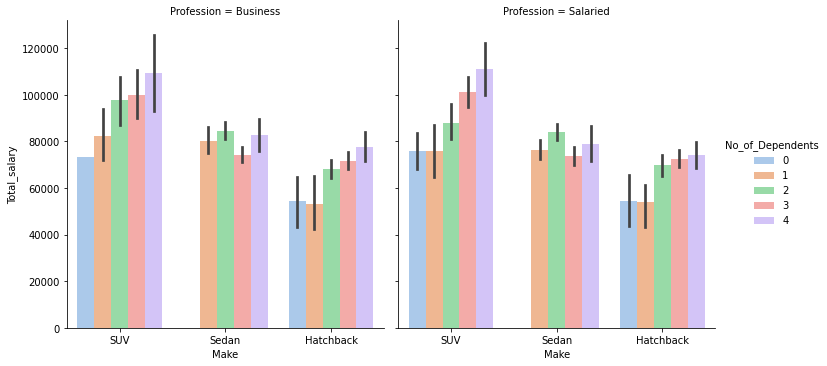

In [19]:
sns.catplot(data=car, x="Make", y="Total_salary", col="Profession", hue="No_of_Dependents", kind='bar', palette='pastel');

### D. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data. 

<AxesSubplot:xlabel='Age', ylabel='Count'>

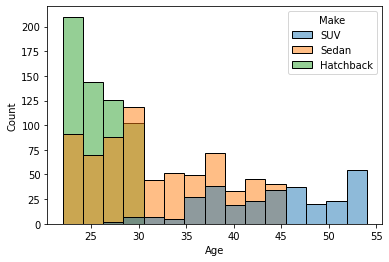

In [20]:
sns.histplot(data=car, x= 'Age', hue='Make')

#### Insights
Younger age group (20-30 ) they mostly buy Hatchback and Sedan as compared to SUV
Mid age group (31-45) they mostly buy Sedan and SUV (few sales only) with no sales of hatchback to this age group.
Older Age group (46-55) only buy SUV with no sales of Sedan or Hatchback.
There is zero sales of Hatchback from the age group 31 to 46. 

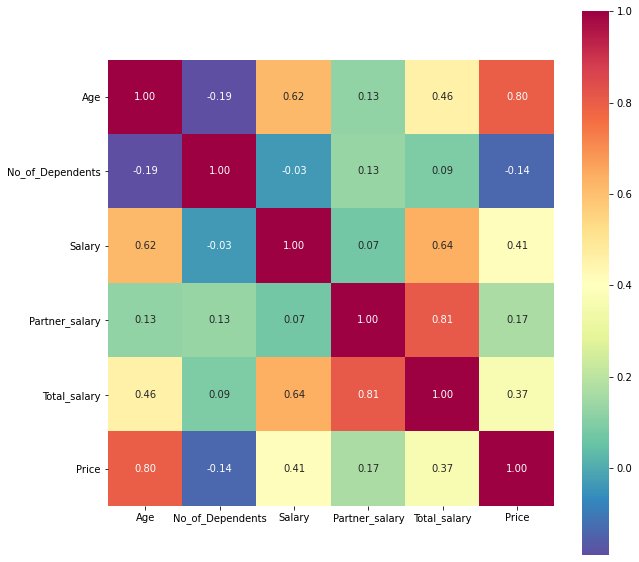

In [21]:
corrmat = car.corr()
plt.figure(figsize=(10,10))
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10},  
                 cmap="Spectral_r")
plt.show()

### E. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available. 
### E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women” 
### E2) Ned Stark believes that a salaried person is more likely to buy a Sedan. 
### E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

Answer E1) Disagree. Men and women both prefer SUV. But Women prefer SUV by a larger margin than Men.  

Answer E2) Agree. Based on the histogram plot from C), a salaried person is more likely to buy a sedan. 

Answer E3) 

### F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.

### Give justification along with presenting metrics/charts used for arriving at the conclusions.

### F1) Gender



In [22]:
car.groupby(['Gender'])['Gender'].count()

Gender
Female     337
Male      1244
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

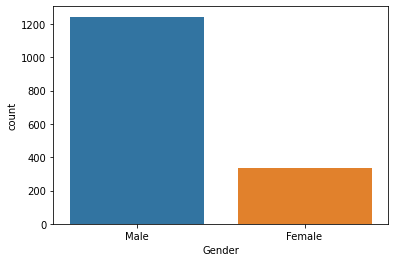

In [23]:
sns.countplot(data=car,x='Gender')

In [24]:
car.groupby(['Gender'])['Price'].mean()

Gender
Female    47543.026706
Male      32361.736334
Name: Price, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Price'>

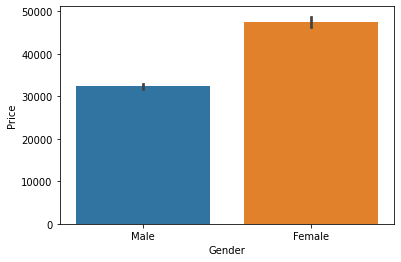

In [25]:
sns.barplot(data=car,x='Gender',y='Price')

### F2) Personal

In [26]:
car.groupby(['Personal_loan'])['Price'].mean()

Personal_loan
No     36742.712294
Yes    34457.070707
Name: Price, dtype: float64

<AxesSubplot:xlabel='Personal_loan', ylabel='Price'>

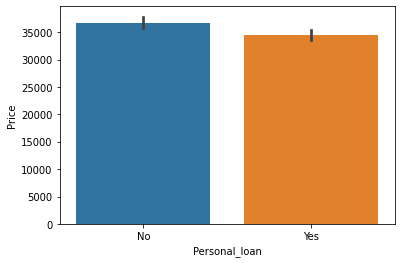

In [27]:
sns.barplot(data=car,x='Personal_loan',y='Price')

### G. From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

In [28]:
car.groupby(['Partner_working'])['Price'].mean()

Partner_working
No     36000.000000
Yes    35267.281106
Name: Price, dtype: float64

<AxesSubplot:xlabel='Partner_working', ylabel='Price'>

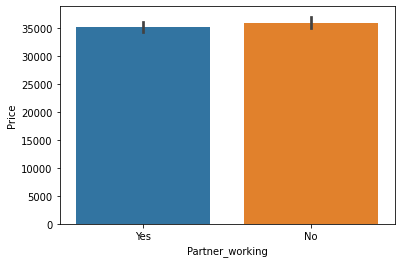

In [29]:
sns.barplot(data=car,x='Partner_working',y='Price')

### H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history

In [30]:
pd.crosstab(car['Gender'], car['Make'],margins=True)

Make,Hatchback,SUV,Sedan,All
Gender,,,,
Female,15,178,144,337
Male,567,119,558,1244
All,582,297,702,1581


In [31]:
pd.crosstab(car['Marital_status'],car['Make'])

Make,Hatchback,SUV,Sedan
Marital_status,,,
Married,498,281,664
Single,84,16,38


In [37]:
cols = ['Profession', 'Make', 'Gender']
car.groupby(cols)[cols].count()

Profession  Make  Gender
Profession Make      Gender                          
Business   Hatchback Male           290   290     290
           SUV       Female          56    56      56
                     Male            33    33      33
           Sedan     Female          50    50      50
                     Male           256   256     256
Salaried   Hatchback Female          15    15      15
                     Male           277   277     277
           SUV       Female         122   122     122
                     Male            86    86      86
           Sedan     Female          94    94      94
                     Male           302   302     302

## Problem 2
### ***Framing An Analytics Problem*** Analyse the dataset and list down the top 5 important variables, along with the business justifications.

In [32]:
df = pd.read_excel('godigt_cc_data.xlsx', engine='openpyxl')
df.head(10)

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit,Unnamed: 28
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,0,0,0,0,0,T,27729,Self Employed,290000,NaN
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,0,0,0,0,0,R,280854,0,950000,NaN
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,1,0,0,0,0,R,70587,Student,210000,NaN
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,0,0,1,0,0,T,9156,Self Employed,80000,NaN
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,1,0,0,0,0,T,38108,Salaried,220000,NaN
5,6,5241 78XX XXXX XXXX,524178,Mastercard,cashback,2015-01-28,E,0,0,1,...,0,0,0,0,0,R,44515,Retired,50000,NaN
6,7,4055 33XX XXXX XXXX,405533,Visa,cashback,2013-11-08,E,1,1,1,...,0,0,0,0,0,T,15779,Retired,20000,NaN
7,8,4375 51XX XXXX XXXX,437551,Visa,edge,2014-12-27,B,0,1,1,...,0,0,0,0,0,T,40290,Salaried,260000,NaN
8,9,4377 48XX XXXX XXXX,437748,Visa,cashback,2015-07-15,D,0,0,1,...,0,0,0,0,0,T,56123,Housewife,120000,NaN
9,10,4386 28XX XXXX XXXX,438628,Visa,shoprite,2000-09-20,D,0,0,0,...,0,0,0,0,0,T,9453,Salaried,80000,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [42]:
df.drop(df.columns[[28]], axis=1, inplace=True)

In [43]:
df['Transactor_revolver'] = df['Transactor_revolver'].fillna(method='pad')

In [44]:
df.isnull().sum()

userid                     0
card_no                    0
card_bin_no                0
Issuer                     0
card_type                  0
card_source_date           0
high_networth              0
active_30                  0
active_60                  0
active_90                  0
cc_active30                0
cc_active60                0
cc_active90                0
hotlist_flag               0
widget_products            0
engagement_products        0
annual_income_at_source    0
other_bank_cc_holding      0
bank_vintage               0
T+1_month_activity         0
T+2_month_activity         0
T+3_month_activity         0
T+6_month_activity         0
T+12_month_activity        0
Transactor_revolver        0
avg_spends_l3m             0
Occupation_at_source       0
cc_limit                   0
dtype: int64

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,8448.0,4.224500e+03,2.438872e+03,1.0,2112.75,4224.5,6336.25,8448.0
card_bin_no,8448.0,4.367470e+05,3.048975e+04,376916.0,426241.00,437551.0,438439.00,524178.0
active_30,8448.0,2.923769e-01,4.548815e-01,0.0,0.00,0.0,1.00,1.0
active_60,8448.0,4.947917e-01,5.000025e-01,0.0,0.00,0.0,1.00,1.0
active_90,8448.0,6.420455e-01,4.794271e-01,0.0,0.00,1.0,1.00,1.0
cc_active30,8448.0,2.840909e-01,4.510070e-01,0.0,0.00,0.0,1.00,1.0
cc_active60,8448.0,4.844934e-01,4.997891e-01,0.0,0.00,0.0,1.00,1.0
cc_active90,8448.0,6.323390e-01,4.821970e-01,0.0,0.00,1.0,1.00,1.0
widget_products,8448.0,3.614583e+00,2.273193e+00,0.0,2.00,4.0,6.00,7.0
engagement_products,8448.0,3.991122e+00,2.572135e+00,0.0,2.00,4.0,6.00,8.0


<AxesSubplot:xlabel='card_type', ylabel='avg_spends_l3m'>

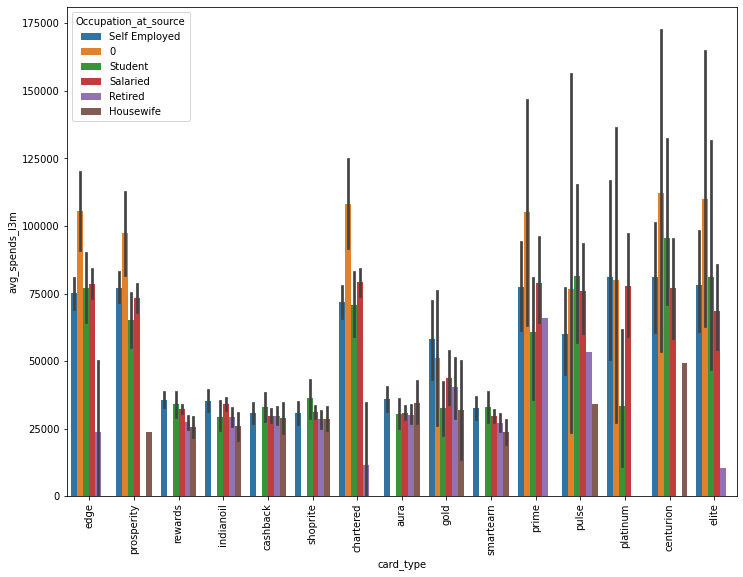

In [62]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
sns.barplot(data=df,x='card_type',y='avg_spends_l3m',hue='Occupation_at_source')

<AxesSubplot:xlabel='other_bank_cc_holding', ylabel='avg_spends_l3m'>

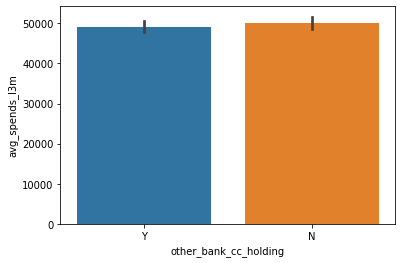

In [51]:
sns.barplot(data=df,x='other_bank_cc_holding',y='avg_spends_l3m')

<AxesSubplot:xlabel='Transactor_revolver', ylabel='count'>

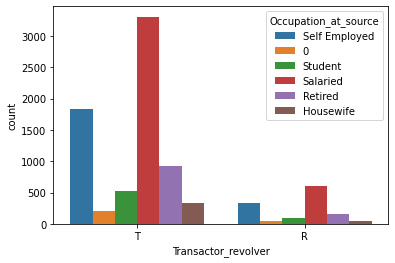

In [64]:
sns.countplot(data=df,x='Transactor_revolver',hue='Occupation_at_source')

<AxesSubplot:xlabel='cc_limit', ylabel='avg_spends_l3m'>

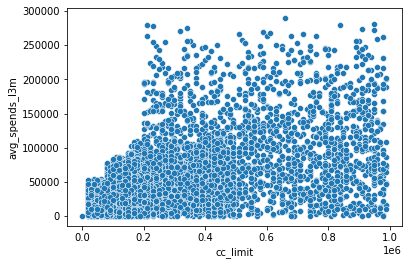

In [55]:
sns.scatterplot(data=df,x='cc_limit',y='avg_spends_l3m')

<AxesSubplot:xlabel='Issuer', ylabel='count'>

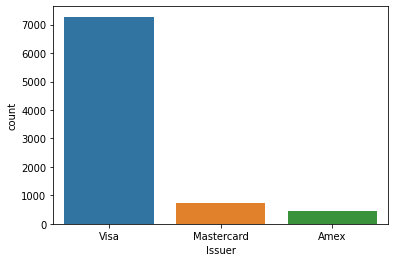

In [65]:
sns.countplot(data=df,x='Issuer')

<AxesSubplot:xlabel='Occupation_at_source', ylabel='count'>

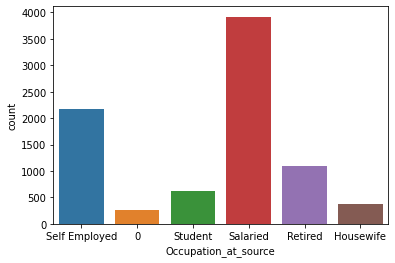

In [66]:
sns.countplot(data=df,x='Occupation_at_source')

<AxesSubplot:xlabel='annual_income_at_source', ylabel='avg_spends_l3m'>

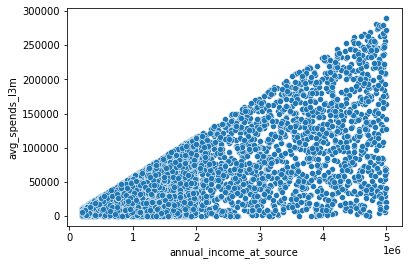

In [61]:
sns.scatterplot(data=df,x='annual_income_at_source',y='avg_spends_l3m')